In [19]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [20]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"

In [21]:
experiments, outcomes = load_results("simulation/generated/" + ACTOR)
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]
outcomes_df = pd.DataFrame(outcomes)

In [22]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [23]:
DIFDAMAGE = outcomes_df.columns[0]
DIFDEATHS = outcomes_df.columns[1]
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]
COSTS = outcomes_df.columns[4]

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_

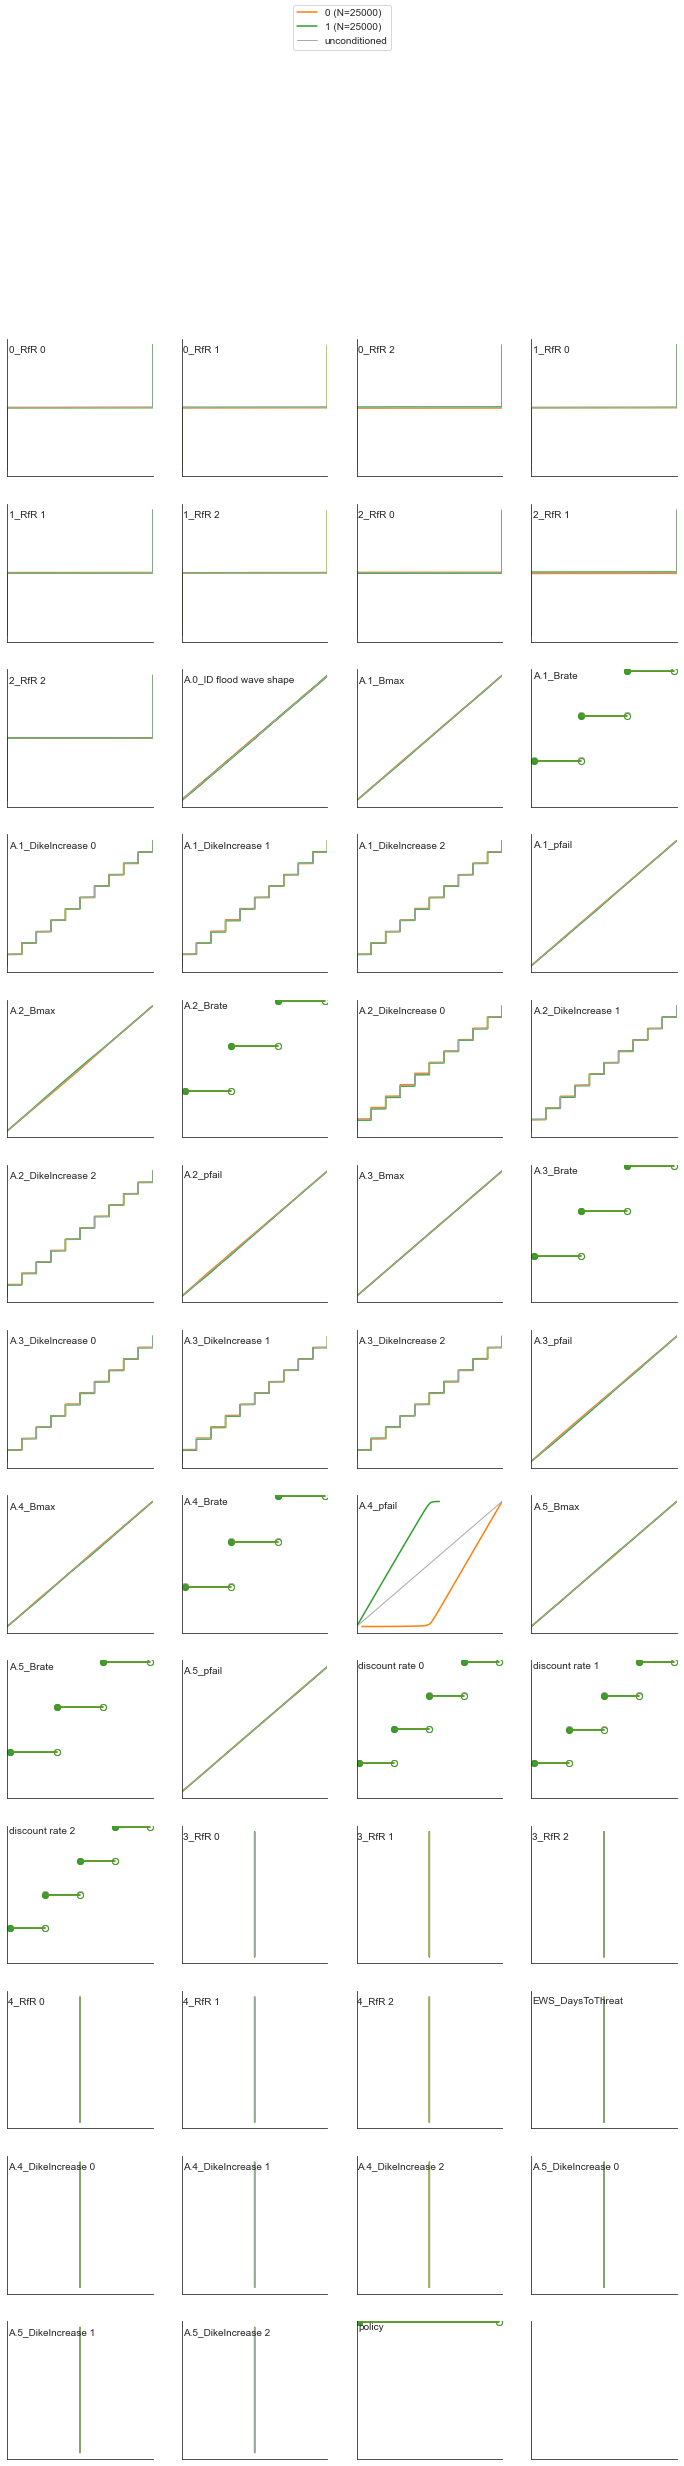

In [14]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes[DEATHS] >  np.percentile(a=outcomes_df[DEATHS], q=50)
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
damage_scaled = min_max_scaler.fit_transform(pd.DataFrame(outcomes[DAMAGE]).values)
deaths_scaled = min_max_scaler.fit_transform(pd.DataFrame(outcomes[DEATHS]).values)
scaled = (damage_scaled + deaths_scaled)/2

In [7]:
outcomes_df["Scaled"] = scaled
SCALED = 'Scaled'

In [8]:
DAMAGE

'Gorssel Expected Annual Damage'

In [9]:
outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0]

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Budget Overrun,Gorssel Total Costs,Scaled


Looks like there is always more damage in Deventer than in Gorssel if there are not any policies in place

In [10]:
len(outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0])

0

In [11]:
outcomes_df.describe(percentiles=np.arange(0, 1, 0.1))

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Budget Overrun,Gorssel Total Costs,Scaled
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.0,50000.0,50000.000000
mean,-2195.842747,-1.820303e-06,4.394637e+07,0.021209,0.0,0.0,0.236309
std,2558.744855,2.280280e-06,4.660492e+07,0.020512,0.0,0.0,0.236181
min,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.0,0.000000
0%,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.0,0.000000
10%,-5852.691383,-5.174198e-06,2.804631e+06,0.001676,0.0,0.0,0.017638
20%,-3362.048957,-3.213099e-06,6.498399e+06,0.004197,0.0,0.0,0.042752
30%,-2033.402478,-1.871860e-06,8.958514e+06,0.004837,0.0,0.0,0.051459
40%,-1514.690034,-1.173131e-06,1.394666e+07,0.008550,0.0,0.0,0.087856
50%,-1213.798597,-7.219704e-07,1.998865e+07,0.010051,0.0,0.0,0.109276


Obviously, without any policies inplace, there also aren't any costs for Gorssel.

In [12]:
prim_algs = {}
for outcome in [DAMAGE, DEATHS, SCALED]:
    #code block below performs a rotation of data
#     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
#     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
#     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, conditional(outcome))
#     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
#     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
#     x = rotated_x
    
    prim_algs[outcome] = prim.Prim(x,  outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=90), threshold=0.8)

In [13]:
boxes = {}
for key in [DAMAGE, DEATHS, SCALED]:
    print(key)
    boxes[key] = prim_algs[key].find_box()

Gorssel Expected Annual Damage
Gorssel Expected Number of Deaths
Scaled


Gorssel Expected Annual Damage


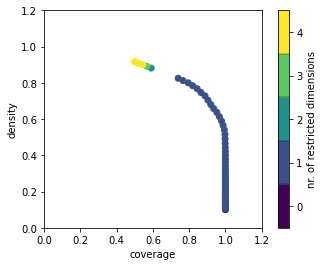

Gorssel Expected Number of Deaths


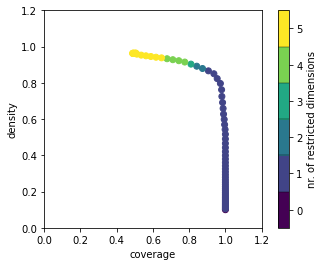

Scaled


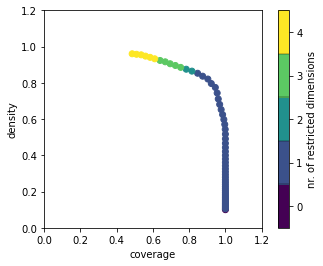

In [26]:
for key, box in boxes.items():
    print(key)
    box.show_tradeoff()
    plt.show()

# Trying around to find the right box

## Damage

In [72]:
box_id=45
BOX = DAMAGE

coverage      0.7944
density     0.800322
id                45
mass         0.09926
mean        0.800322
res_dim            1
Name: 45, dtype: object

             box 45                       
                min       max    qp values
A.4_pfail  0.000014  0.099266  [-1.0, 0.0]



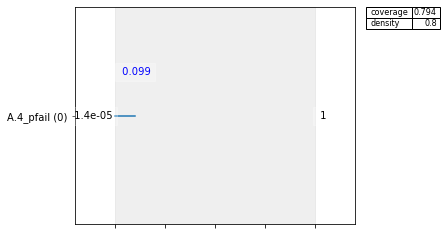

In [73]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

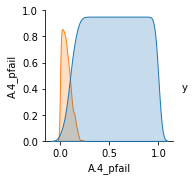

In [74]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

In [75]:
lims = boxes[BOX].box_lims[box_id]

In [76]:
limits = pd.DataFrame(data={"outcome": ["damage"], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})

In [77]:
limits

,outcome,min,max
0,damage,0.000014,0.099266


## Deaths

In [78]:
box_id=42
BOX = DEATHS

coverage    0.954746
density     0.823347
id                42
mass         0.11582
mean        0.823347
res_dim            1
Name: 42, dtype: object

             box 42                       
                min       max    qp values
A.4_pfail  0.000014  0.115819  [-1.0, 0.0]



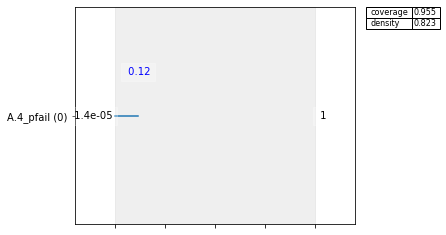

In [79]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

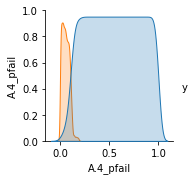

In [80]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

In [81]:
lims2 = boxes[BOX].box_lims[box_id]

In [82]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths"], "min": [lims2["A.4_pfail"][0]], "max" :  [lims2["A.4_pfail"][1]]})], axis=0)

## Scaled

In [84]:
box_id=43
BOX = SCALED

coverage      0.9032
density     0.820942
id                43
mass         0.11002
mean        0.820942
res_dim            1
Name: 43, dtype: object

             box 43                       
                min       max    qp values
A.4_pfail  0.000014  0.110023  [-1.0, 0.0]



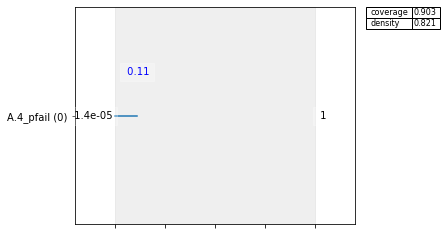

In [85]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

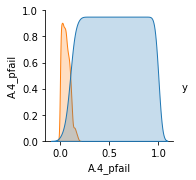

In [86]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

In [87]:
lims = boxes[BOX].box_lims[box_id]

In [88]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["scaled"], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

In [92]:
limits =limits.reset_index(drop=True)

# Visualisation

In [95]:
limits

,outcome,min,max
0,damage,0.000014,0.099266
1,deaths,0.000014,0.115819
2,scaled,0.000014,0.110023


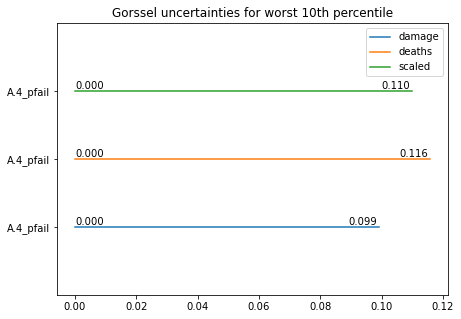

In [110]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))
ax.grid(False)
ax.set_ylim([-1,3])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1,2], ["A.4_pfail"]*3)
plt.title("Gorssel uncertainties for worst 10th percentile")
plt.show()